In [58]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

In [59]:
labeled_data = pd.read_csv("labeled_data.csv")

In [60]:
labeled_data = labeled_data.rename(columns={"Publication Number": "gpa_number"})

In [101]:
labeled_data[all_tiers].sum().astype(int)

AnalysisAndModeling                                              577
AnatomicalTarget                                                 892
CognitiveComputingAndLearningSystems                               4
DataAcquisition                                                  100
DNAMapping/GeneticEngineering                                      1
Imaging                                                          829
Manufacturing                                                    660
PersonalizedProduct                                             1484
SpecificationofUse                                               503
SurgicalMethod                                                   217
SurgicalRobotics                                                  28
SurgicalTracking                                                  34
Validation                                                        36
Verification                                                      37
AnalysisAndModeling_3DModeling    

In [61]:
composite = "AnalysisAndModeling_Simulation_WholeBodyMotionSimulation"
def expand_composite(composite):
    base = ""
    for tag in composite.split('_'):
        base = base + tag
        yield base
        base = base + '_'
list(expand_composite(composite))

['AnalysisAndModeling',
 'AnalysisAndModeling_Simulation',
 'AnalysisAndModeling_Simulation_WholeBodyMotionSimulation']

In [62]:
from util import *

In [65]:
def get_code(row):
    labels = []
    for c in labeled_data.columns:
        if c not in all_tiers:
            continue
        if row[c] == 1.0:
            row[c] = val = True
        else:
            row[c] = val = False
        
        if val:
            for tag in expand_composite(c):
                if tag != c:
                    if tag in row:
                        infer_val = row[tag] == 1.0
                        if infer_val != val:
                            print(f"{row.gpa_number}\t{c}={val}\t{tag}={infer_val}")
                    else:
                        print(f"Adding new parent tag {tag} for {c} because of {row.gpa_number}")
                    row[tag] = val
    return row

In [66]:
coded_data = labeled_data.apply(get_code, axis=1)

US6197065	AnatomicalTarget_Torso_Pelvis=True	AnatomicalTarget=False
US6508841	AnatomicalTarget_Torso_Pelvis=True	AnatomicalTarget=False
US6712855	AnatomicalTarget_Torso_Pelvis=True	AnatomicalTarget=False
US7141073	AnatomicalTarget_Torso_Pelvis=True	AnatomicalTarget=False
US7491235	AnatomicalTarget_Torso_Pelvis=True	AnatomicalTarget=False
US7702380	AnatomicalTarget_Torso_Pelvis=True	AnatomicalTarget=False
US7724355	AnatomicalTarget_Torso_Pelvis=True	AnatomicalTarget=False
US8060841	AnatomicalTarget_Torso_Pelvis=True	AnatomicalTarget=False
US8702686	AnatomicalTarget_Torso_Pelvis=True	AnatomicalTarget=False
US20090144091A1	AnatomicalTarget_LowerExtremity_Knee=True	AnatomicalTarget_LowerExtremity=False
US20130018430A1	AnatomicalTarget_LowerExtremity_Hip=True	AnatomicalTarget_LowerExtremity=False
US20130066321A1	AnatomicalTarget_LowerExtremity_Knee=True	AnatomicalTarget_LowerExtremity=False
US20130103363A1	AnatomicalTarget_LowerExtremity_Hip=True	AnatomicalTarget_LowerExtremity=False
US2013

In [67]:
coded_data.columns

Index(['gpa_number', 'SpecificationofUse_Trauma_Military',
       'SpecificationofUse_Trauma', 'SpecificationofUse_JointReplacement',
       'SpecificationofUse_Fracture', 'SpecificationofUse_Disease_BoneDisease',
       'SpecificationofUse_Disease', 'SpecificationofUse_Cosmetic',
       'SpecificationofUse', 'AnatomicalTarget_UpperExtremity_Wrist',
       'AnatomicalTarget_UpperExtremity_Shoulder',
       'AnatomicalTarget_UpperExtremity_Fingers',
       'AnatomicalTarget_UpperExtremity_Elbow',
       'AnatomicalTarget_UpperExtremity', 'AnatomicalTarget_Torso_Spine',
       'AnatomicalTarget_Torso_Pelvis', 'AnatomicalTarget_Torso',
       'AnatomicalTarget_Skull_Jaw_TMJ', 'AnatomicalTarget_Skull_Jaw',
       'AnatomicalTarget_Skull_Cranium', 'AnatomicalTarget_Skull',
       'AnatomicalTarget_LowerExtremity_Toes',
       'AnatomicalTarget_LowerExtremity_Knee',
       'AnatomicalTarget_LowerExtremity_Hip',
       'AnatomicalTarget_LowerExtremity_Ankle',
       'AnatomicalTarget_LowerExt

In [68]:
coded_data[['country_code', 'serial', 'kind']] = coded_data.gpa_number.str.extract(r'(^\w{2})(\d+)(\w*\d*)')

In [69]:
def fix_us_serial(serial):
    if len(serial) > 7:
        year = serial[:4]
        rest = serial[4:].lstrip("0")
        padding_no = 10 - (len(year) + len(rest))
        return year + ("0" * padding_no) + rest
    else:
        return serial
        

In [70]:
coded_data['padded_serial'] = coded_data['serial'].apply(fix_us_serial)

In [71]:
# import sqlite3
# con = sqlite3.connect("number_lookup")
# df = pd.read_sql_query("select * from number_lookup where country_code in ('US', 'EP', 'WO')", con=con)

In [72]:
patent_data = pd.read_json("dataset_v5.json", lines=True, orient="records")

In [73]:
merged = coded_data.merge(patent_data, how="left", on=["gpa_number"])

In [77]:
pd.set_option('display.max_rows', 200)

In [78]:
merged[pd.isna(merged.top_terms)]

,gpa_number,SpecificationofUse_Trauma_Military,SpecificationofUse_Trauma,SpecificationofUse_JointReplacement,SpecificationofUse_Fracture,SpecificationofUse_Disease_BoneDisease,SpecificationofUse_Disease,SpecificationofUse_Cosmetic,SpecificationofUse,AnatomicalTarget_UpperExtremity_Wrist,...,assignees,citations,examiners,embedding_v1,cited_by,similar_patents,similar_npl,top_terms,description,claims
572,US9451972,False,False,True,False,False,False,False,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304,WO2003030787A1,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1455,CN101099696A,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,CN101249028A,False,False,True,False,False,False,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,CN101390773A,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,CN101396291A,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,CN101513358A,False,False,False,False,True,True,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,CN101530354A,False,False,True,False,False,False,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,CN101766508B,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,CN101953713A,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
matched = merged[~pd.isna(merged.top_terms)].convert_dtypes().drop_duplicates(subset=["gpa_number"])

In [80]:
from  util import *

In [81]:
def array_labels(row):
    labels = []
    for c in labeled_data.columns:
        if c in row and row[c]:
            labels.append(c)
    return list(sorted(set(labels)))

In [82]:
def combine_labels(row):
    labels = []
    for c in labeled_data.columns:
        if c in row and row[c]:
            labels.append(c)
    return ', '.join(labels)

In [83]:
matched

,gpa_number,SpecificationofUse_Trauma_Military,SpecificationofUse_Trauma,SpecificationofUse_JointReplacement,SpecificationofUse_Fracture,SpecificationofUse_Disease_BoneDisease,SpecificationofUse_Disease,SpecificationofUse_Cosmetic,SpecificationofUse,AnatomicalTarget_UpperExtremity_Wrist,...,assignees,citations,examiners,embedding_v1,cited_by,similar_patents,similar_npl,top_terms,description,claims
0,US5735875,False,False,False,False,False,False,False,False,False,...,[BONUTTI PETER M],"[US-3513848-A, US-4414166-A, US-4506681-A, US-...",[Jackson Gary],"[0.052588772000000006, -0.079047374, 0.0528130...","[US-6059817-A, US-6077277-A, US-6231592-B1, US...","[US-10517584-B1, JP-6127101-B2, US-10470893-B2...",[],"[suture, retainer, plastic material, material,...",RELATED APPLICATIONS This application is...,The following is claimed: 1. An ...
1,US5796617,False,False,False,False,False,False,False,False,False,...,[],"[US-4909127-A, US-4936862-A, US-4975262-A, US-...",[Ruggiero Joseph],"[0.18197101000000002, -0.23043318000000002, -0...","[US-6101450-A, WO-0115058-A1, US-6263252-B1, U...","[JP-6335678-B2, EP-0592541-B1, US-2008300831-A...",[],"[material property, prosthesis, manufacturing,...",This application is a continuation of applicat...,I claim: 1. A method for manufac...
2,US5888219,False,False,False,False,False,False,False,False,False,...,[],"[DE-337437-C, CH-117960-A, US-1959615-A, US-24...",[Prebilic Paul B.],"[-0.006052601, -0.17595273, -0.07911, -0.08232...","[US-6132472-A, WO-0113822-A1, US-2002029045-A1...","[US-2017319353-A1, US-9956085-B2, US-9867706-B...",[],"[tissue, press, human, bone tissue, bone, step...",This is a divisional of application Ser. No. 0...,I claim: 1. A method of using hu...
3,US5928267,False,False,False,False,False,False,False,False,False,...,[BONUTTI PETER M],"[US-3513848-A, US-4414166-A, US-4456005-A, US-...",[Jackson Gary],"[0.045985990000000004, -0.07630217, 0.04453541...","[US-6264675-B1, US-6296645-B1, US-6478809-B1, ...","[US-10517584-B1, US-9924988-B2, JP-6127101-B2,...",[],"[suture, plastic material, suture anchor, end ...",RELATED APPLICATION This application is ...,The following is claimed: 1. A m...
4,US6059817,False,False,False,False,False,False,False,False,False,...,[BONUTTI PETER M],"[US-3513848-A, US-4064566-A, US-4171544-A, US-...",[Jackson Gary],"[0.054270383000000005, -0.07392473000000001, 0...","[WO-0234159-A2, WO-0234159-A3, US-2003028196-A...","[US-10517584-B1, US-10470893-B2, US-9801673-B2...",[],"[article, suture, thermoplastic material, meth...",RELATED APPLICATIONS This application is...,What is claimed is: 1. A method ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,WO2017080646A1,False,False,False,False,False,False,False,False,False,...,[KUKA ROBOTER GMBH],"[US-2003100824-A1, WO-2006020685-A2, WO-201505...",[],"[0.17270802, -0.24550398, 0.0556823, -0.010736...","[WO-2018185755-A1, EP-3463169-A4]","[US-10064682-B2, US-9566124-B2, US-10507067-B2...",[],"[implant, articulated arm, patient, robot, arm...",<NA>,<NA>
1634,EP2446854A1,False,False,False,False,False,False,False,False,False,...,"[GIULIANO MANUELA, MIELECKE PETER]","[DE-102005039382-A1, EP-1757315-A1]",[],"[-0.08820092, -0.16216987, -0.06811617, -0.240...","[CN-103349796-A, CN-103349796-B, CN-107582194-A]","[US-9649178-B2, US-2016354182-A1, JP-6600680-B...",[],"[bone, device, tissue, regeneration, wall memb...",<NA>,<NA>
1635,WO2014198279A1,False,False,False,False,False,False,False,False,False,...,[HAFEZ MAHMOUD ALM EL DIN],[],[],"[0.12713102, -0.07522624, -0.05175163600000000...","[WO-2017186255-A1, US-10653454-B2]","[CN-103841924-B, EP-2744454-B1, WO-2017160651-...",[],"[patient, artificial, specific, produced, devi...",<NA>,<NA>
1636,WO2017091657A1,False,False,True,False,False,False,False,True,False,...,[SUBCHONDRAL SOLUTIONS INC],"[US-4615705-A, GB-2236679-A, US-6037519-A, US-...",[],"[0.056024250000000005, -0.08921509, 0.03186828...","[CN-110215318-A, US-10405993-B2]

In [84]:
label_positives = matched[all_tiers].astype(int).sum().to_frame("positives")

In [92]:
label_positives.sort_values("positives", ascending=False)

,positives
PersonalizedProduct,1368
AnatomicalTarget,843
PersonalizedProduct_Implant,747
Imaging,732
PersonalizedProduct_Guide/Jig,623
AnatomicalTarget_LowerExtremity,615
Manufacturing,568
AnalysisAndModeling,494
AnatomicalTarget_LowerExtremity_Knee,458
SpecificationofUse,456


In [153]:
over100 = set(list(sorted(label_positives[label_positives.positives > 100].index.values)))

In [154]:
matched['tier1_tags'] = matched[tier1].apply(combine_labels, axis=1)

In [155]:
matched['tier1_tier2_tags'] = matched[tier1+tier2].apply(combine_labels, axis=1)

In [156]:
matched['all_tiers'] = matched[all_tiers].apply(combine_labels, axis=1)

In [157]:
pd.set_option('display.max_rows', 479)

<AxesSubplot:>

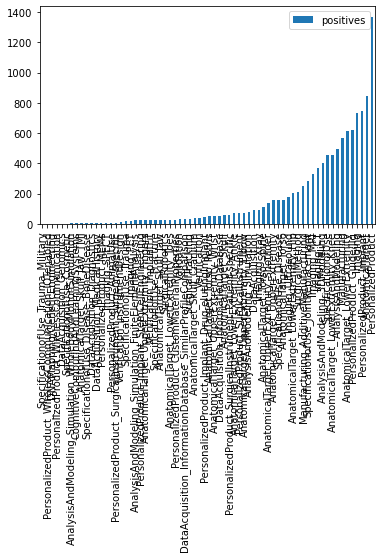

In [158]:
label_positives.sort_values("positives").plot(kind='bar')

In [159]:
len(all_tiers)

68

<AxesSubplot:>

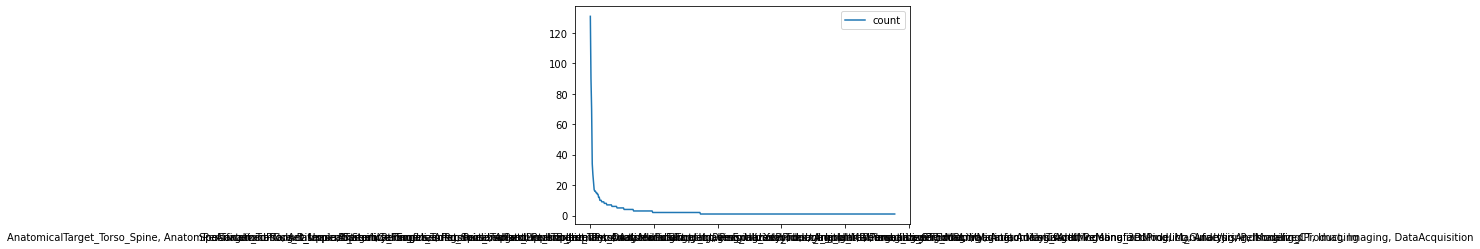

In [160]:
matched.all_tiers.value_counts().to_frame("count").plot()

In [161]:
matched['all_tiers_100'] = matched[set(all_tiers)&set(over100)].apply(combine_labels, axis=1)

In [162]:
matched['tier1_100'] = matched[set(tier1)&set(over100)].apply(combine_labels, axis=1)

In [163]:
matched['tier2_100'] = matched[set(tier2)&set(over100)].apply(combine_labels, axis=1)

In [164]:
matched['tier3_100'] = matched[set(tier3)&set(over100)].apply(combine_labels, axis=1)

In [184]:
label_counts = matched.all_tiers.value_counts() #.to_frame("count").sort_values("count", ascending=True).plot(kind="barh", fontsize=10, figsize=(5, 25))

In [218]:
label_counts

SpecificationofUse_Disease, SpecificationofUse, PersonalizedProduct_Implant, PersonalizedProduct, Imaging_Ultrasound, Imaging_MRI, Imaging_CT, Imaging                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        131
AnatomicalTarget_LowerExtremity_Knee, AnatomicalTarget_LowerExtremity, AnatomicalTarget, SurgicalMethod, PersonalizedProduct_Guide/Jig, PersonalizedProduct                                                           

In [229]:
counts = matched['tier1_tags'].value_counts()
counts[counts > 20].index

Index(['SpecificationofUse, PersonalizedProduct, Imaging',
       'AnatomicalTarget, PersonalizedProduct',
       'AnatomicalTarget, SurgicalMethod, PersonalizedProduct',
       'PersonalizedProduct, Manufacturing, Imaging, AnalysisAndModeling',
       'SpecificationofUse, AnatomicalTarget, PersonalizedProduct, Manufacturing, AnalysisAndModeling',
       'SpecificationofUse, AnatomicalTarget, PersonalizedProduct',
       'SpecificationofUse, AnatomicalTarget, PersonalizedProduct, Manufacturing, Imaging, AnalysisAndModeling',
       'PersonalizedProduct',
       'AnatomicalTarget, PersonalizedProduct, Manufacturing, Imaging, AnalysisAndModeling',
       'AnatomicalTarget, PersonalizedProduct, Imaging',
       'AnatomicalTarget, PersonalizedProduct, Imaging, AnalysisAndModeling',
       'AnatomicalTarget, PersonalizedProduct, Manufacturing',
       'AnatomicalTarget, PersonalizedProduct, Manufacturing, Imaging',
       'PersonalizedProduct, Manufacturing, Imaging',
       'PersonalizedPr

In [222]:
matched['tier1_tags'].value_counts().shape

(117,)

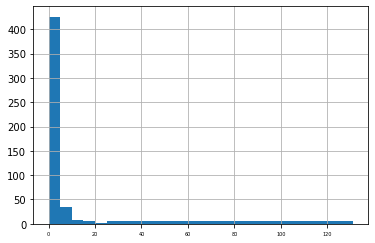

In [212]:
g = label_counts.hist(xlabelsize=5, bins=[0, 5, 10, 15, 20, 25, 131])

In [190]:
dir(g)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_box_aspect',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',

In [33]:
matched.columns.tolist()

['gpa_number',
 'SpecificationofUse_Trauma_Military',
 'SpecificationofUse_Trauma',
 'SpecificationofUse_JointReplacement',
 'SpecificationofUse_Fracture',
 'SpecificationofUse_Disease_BoneDisease',
 'SpecificationofUse_Disease',
 'SpecificationofUse_Cosmetic',
 'SpecificationofUse',
 'AnatomicalTarget_UpperExtremity_Wrist',
 'AnatomicalTarget_UpperExtremity_Shoulder',
 'AnatomicalTarget_UpperExtremity_Fingers',
 'AnatomicalTarget_UpperExtremity_Elbow',
 'AnatomicalTarget_UpperExtremity',
 'AnatomicalTarget_Torso_Spine',
 'AnatomicalTarget_Torso_Pelvis',
 'AnatomicalTarget_Torso',
 'AnatomicalTarget_Skull_Jaw_TMJ',
 'AnatomicalTarget_Skull_Jaw',
 'AnatomicalTarget_Skull_Cranium',
 'AnatomicalTarget_Skull',
 'AnatomicalTarget_LowerExtremity_Toes',
 'AnatomicalTarget_LowerExtremity_Knee',
 'AnatomicalTarget_LowerExtremity_Hip',
 'AnatomicalTarget_LowerExtremity_Ankle',
 'AnatomicalTarget_LowerExtremity',
 'AnatomicalTarget',
 'SurgicalTracking',
 'SurgicalRobotics',
 'SurgicalMethod',
 '

In [40]:
fulltext = matched[(~pd.isna(matched.claims)) & (~pd.isna(matched.description)) & (~pd.isna(matched.abstract))]

In [43]:
fulltext.to_json("matched.json.gz", compression="gzip", lines=True, orient="records")

In [44]:
fulltext.shape

(1215, 110)

In [45]:
# can't really just use families, because there are 300+ examples where tags differ within one family

In [46]:
#families = list(
#fulltext.drop_duplicates(subset=['family_id', 'tier1_tags'])

In [47]:
#len(families)

In [48]:
#test = # .unique().shape

In [49]:
fulltext[all_tiers_100].sum()

AnalysisAndModeling                         426
AnalysisAndModeling_3DModeling              350
AnatomicalTarget                            770
AnatomicalTarget_LowerExtremity             566
AnatomicalTarget_LowerExtremity_Hip         189
AnatomicalTarget_LowerExtremity_Knee        426
AnatomicalTarget_Torso                      145
AnatomicalTarget_Torso_Spine                 97
AnatomicalTarget_UpperExtremity             144
AnatomicalTarget_UpperExtremity_Shoulder    123
Imaging                                     650
Imaging_CT                                  333
Imaging_MRI                                 306
Imaging_Ultrasound                          170
Manufacturing                               470
Manufacturing_AdditiveManufacturing         186
PersonalizedProduct_Guide/Jig               546
PersonalizedProduct_Implant                 662
SpecificationofUse                          426
SpecificationofUse_Disease                  152
SpecificationofUse_JointReplacement     

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
stratify =  fulltext[all_tiers_100].apply(combine_labels, axis=1)

In [53]:
#no stratification
training_set, testing_set = train_test_split(fulltext, test_size=0.2, random_state=42)

In [58]:
#training_families, testing_families = train_test_split(families, test_size=0.2, random_state=42)

In [59]:
#training_set = fulltext[fulltext.family_id.isin(training_families)]

In [79]:
#testing_set = fulltext[fulltext.family_id.isin(testing_families)]

In [54]:
training_set[all_tiers_100].sum()

AnalysisAndModeling                         342
AnalysisAndModeling_3DModeling              279
AnatomicalTarget                            606
AnatomicalTarget_LowerExtremity             453
AnatomicalTarget_LowerExtremity_Hip         149
AnatomicalTarget_LowerExtremity_Knee        344
AnatomicalTarget_Torso                      110
AnatomicalTarget_Torso_Spine                 76
AnatomicalTarget_UpperExtremity             113
AnatomicalTarget_UpperExtremity_Shoulder    100
Imaging                                     517
Imaging_CT                                  274
Imaging_MRI                                 247
Imaging_Ultrasound                          138
Manufacturing                               387
Manufacturing_AdditiveManufacturing         148
PersonalizedProduct_Guide/Jig               426
PersonalizedProduct_Implant                 538
SpecificationofUse                          347
SpecificationofUse_Disease                  122
SpecificationofUse_JointReplacement     

In [55]:
testing_set[all_tiers_100].sum()

AnalysisAndModeling                          84
AnalysisAndModeling_3DModeling               71
AnatomicalTarget                            164
AnatomicalTarget_LowerExtremity             113
AnatomicalTarget_LowerExtremity_Hip          40
AnatomicalTarget_LowerExtremity_Knee         82
AnatomicalTarget_Torso                       35
AnatomicalTarget_Torso_Spine                 21
AnatomicalTarget_UpperExtremity              31
AnatomicalTarget_UpperExtremity_Shoulder     23
Imaging                                     133
Imaging_CT                                   59
Imaging_MRI                                  59
Imaging_Ultrasound                           32
Manufacturing                                83
Manufacturing_AdditiveManufacturing          38
PersonalizedProduct_Guide/Jig               120
PersonalizedProduct_Implant                 124
SpecificationofUse                           79
SpecificationofUse_Disease                   30
SpecificationofUse_JointReplacement     

In [56]:
training_set.to_json("training_set.json.gz", lines=True, orient="records")

In [57]:
testing_set.to_json("testing_set.json.gz", lines=True, orient="records")